In [1]:
import numpy as np 
import pandas as pd 
# visulaization
import matplotlib.pyplot as plt
import seaborn as sns
#for Normalization
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
#handling categorical feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
#for QQplot
import statsmodels.api as sm
#spliting data
from sklearn.model_selection import train_test_split
#evaluating models
from sklearn.metrics import r2_score
#check normality
from scipy.stats import shapiro


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# `01` Load The Data

In [2]:
df = pd.read_csv("cleaned_data.csv").drop(columns=['Unnamed: 0'])
df.head(2)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,tableau,data visualization,aws,docker,deployment,job_simp,experience_lvl,num_competitors,company_age,job_state
0,data scientist,"data scientist\nlocation: albuquerque, nm\nedu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,1,1,0,0,0,data scientist,na,0,49,NM
1,healthcare data scientist,what you will do:\n\ni. general summary\n\nthe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,0,1,0,0,0,data scientist,na,0,38,MD


In [3]:
## separating the categorical features and numerical features
num_cols = list(set(df.select_dtypes(exclude=[object]).columns) - set (['min_salary', 'max_salary']))
cat_cols = list(set(df.select_dtypes(include=[object]).columns) - set(['Job Title', 'Job Description', 'Company Name', 'Competitors', 'Industry', 'Location', 'Headquarters']))  

print(f'numerical columns = {len(num_cols)}')
print(f'categorical columns = {len(cat_cols)}')

numerical columns = 22
categorical columns = 7


# `02` Data preprocessing

## `-` Handle Nulls Values

First Handle categorical columns null values

In [4]:
df[cat_cols].isnull().sum()

experience_lvl        0
Size                  1
Sector               10
Type of ownership     1
job_state             0
Revenue               1
job_simp              0
dtype: int64

In [5]:
for column in cat_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [6]:
df[cat_cols].isna().sum()

experience_lvl       0
Size                 0
Sector               0
Type of ownership    0
job_state            0
Revenue              0
job_simp             0
dtype: int64

handle numeric columns null values
If it follows a normal distribution, therefore we can replace null values with the mean of the distribution.
and if it follows right/left skewed, we replace null values with median

In [7]:
df[num_cols].isna().sum()

docker                      0
avg_salary                  0
sql                         0
num_competitors             0
data visualization          0
deployment                  0
Rating                      0
tableau                     0
c++                         0
r programming               0
Founded                     0
python                      0
spark                       0
excel                       0
hourly                      0
scikit                      0
employer_provided_salary    0
company_age                 0
keras                       0
powerbi                     0
aws                         0
tensorflow                  0
dtype: int64

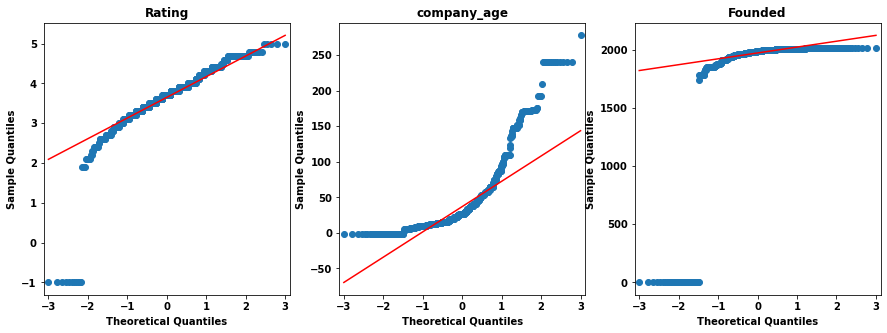

In [8]:
import statsmodels.api as sm

cols = ['Rating', 'company_age', 'Founded']
plt.figure(figsize=(15,5))
for i, col in enumerate(df[cols]):
    ax = plt.subplot(1, 3, i+1)
    ax.set_title(col)
    sm.qqplot(df[col],fit = False, line='q', ax = ax)
plt.show()

In [9]:
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df["company_age"] = df["company_age"].fillna(df["company_age"].median())
df["Founded"] = df["Founded"].fillna(df["Founded"].median())

## `-` Encode Categorical Features

In [10]:
df[cat_cols]

,experience_lvl,Size,Sector,Type of ownership,job_state,Revenue,job_simp
0,na,501 to 1000 employees,Aerospace & Defense,Company - Private,NM,$50 to $100 million (USD),data scientist
1,na,10000+ employees,Health Care,Other Organization,MD,$2 to $5 billion (USD),data scientist
2,na,501 to 1000 employees,Business Services,Company - Private,FL,$100 to $500 million (USD),data scientist
3,na,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",Government,WA,$500 million to $1 billion (USD),data scientist
4,na,51 to 200 employees,Business Services,Company - Private,NY,Unknown / Non-Applicable,data scientist
...,...,...,...,...,...,...,...
737,senior,10000+ employees,Biotech & Pharmaceuticals,Company - Public,MA,$10+ billion (USD),na
738,senior,1001 to 5000 employees,Information Technology,Company - Public,TN,$100 to $500 million (USD),data engineer
739,na,501 to 1000 employees,Education,College / University,PA,Unknown / Non-Applicable,na
740,manager,1 to 50 employees,Business Services,Company - Private,PA,$5 to $10 million (USD),data scientist


In [11]:
dummy_encoded_df = pd.get_dummies(df[cat_cols], drop_first = True)

In [12]:
dummy_encoded_df.head(2)

,experience_lvl_consult,experience_lvl_director,experience_lvl_jr,experience_lvl_manager,experience_lvl_na,experience_lvl_senior,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,...,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_simp_Research Scientist,job_simp_SWE,job_simp_data analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_na
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_dummy = pd.concat([df[num_cols], dummy_encoded_df], axis=1)

# display data with dummy variables
df_dummy.shape

(742, 124)

## `-` Split predictors 

In [15]:
df_dummy = sm.add_constant(df_dummy)

In [16]:
X = df_dummy.drop(["avg_salary"], axis = 1)
y = df_dummy[["avg_salary"]]

## `-` Drop Highly correlated features 

In [18]:
# inspecting the correlation between each couple of features
num_cols_wthout_response_variable = X.columns
corr_matrix = X.corr()
# corr_matrix

In [19]:
for row_idx in range(corr_matrix.values.shape[0]):
    for col_idx in range(row_idx + 1,corr_matrix.values.shape[0]):
        if (np.abs(corr_matrix.values[row_idx, col_idx]) > 0.7):
            var_row_corr_wth_response = np.abs(np.corrcoef(y['avg_salary'], 
                                                    X[num_cols_wthout_response_variable[row_idx]])[0, 1])
            var_col_corr_wth_response = np.abs(np.corrcoef(y['avg_salary'], 
                                                    X[num_cols_wthout_response_variable[col_idx]])[0, 1])
            
            if var_row_corr_wth_response > var_col_corr_wth_response:
                print('we will drop the column ', num_cols_wthout_response_variable[col_idx])
                X = X.drop(columns = [num_cols_wthout_response_variable[col_idx]])
            else:
                print('we will drop the column ', num_cols_wthout_response_variable[row_idx])
                X = X.drop(columns = [num_cols_wthout_response_variable[row_idx]])

we will drop the column  experience_lvl_na
we will drop the column  Type of ownership_Government


## `-` Feature Selection

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

select_feature = SelectKBest(f_regression, k=42).fit_transform(X,y)
X2 = select_feature.transform(X)

shape of X_train : (593, 42)
shape of X_test  : (149, 42)
shape of y_train : (593, 1)
shape of y_test  : (149, 1)


c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## `-` Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)
print("shape of X_train :",X_train.shape)
print("shape of X_test  :",X_test.shape)
print("shape of y_train :",y_train.shape)
print("shape of y_test  :",y_test.shape)

## `-` Evaluation Metrices

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def adj_r_squared(X, actual: np.ndarray, predicted: np.ndarray): 
  r_squ = r2_score(actual, predicted)
  return (1-(1-r_squ)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))

    
def Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred):
  print('               :  Train Data     |   Test Data ')
  print('mse            : ', mean_squared_error(Y_train, y_train_pred), '  | ', mean_squared_error(Y_test, y_test_pred))
  print('mae            : ', mean_absolute_error(Y_train, y_train_pred), '  | ',  mean_absolute_error(Y_test, y_test_pred))
  print('r_squared      : ', r2_score(Y_train, y_train_pred), '  | ', r2_score(Y_test, y_test_pred))
  print('adj_r_squared  : ', adj_r_squared(X_train, Y_train, y_train_pred), '  | ', adj_r_squared(X_test, Y_test, y_test_pred))


# `03` Model Building and Tuning

## `-` Decision Tree

In [76]:
# Tune the model
max_depth = [4, 5, 6]
max_features = [x for x in range(1, 5)]
ccp_alpha = [x for x in np.linspace(0.0001, 0.01, num = 5)]

random_grid = {
               'max_depth': max_depth,
               'max_features' : max_features, 
               'ccp_alpha' : ccp_alpha,
               'criterion' : ['absolute_error', 'squared_error']
               }
dt = DecisionTreeRegressor()

In [77]:
grid_search = GridSearchCV(estimator = dt, 
                           param_grid = random_grid, 
                           scoring= 'neg_mean_absolute_error',
                           cv = 3, 
                           verbose = 1).fit(X_train, y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'ccp_alpha': 0.002575,
 'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 4}

In [86]:
# build the model
decision_tree = DecisionTreeRegressor(ccp_alpha = 0.002, criterion = 'absolute_error', max_depth = 6, max_features= 4, random_state = 42) 
# fit the model
decision_tree_model = decision_tree.fit(X_train, y_train) 
y_pred_DT=decision_tree_model.predict(X_test)
y_train_pred = decision_tree_model.predict(X_train)
# evaluate the model
Evaluation_report (X_train, y_train, y_train_pred, X_test, y_test, y_pred_DT)

## `-` Random Forest

In [48]:
#Tune the model
n_estimators = [400, 500, 700]
max_depth = [4, 5, 6]
max_samples = [250, 300, 350]
min_samples_split = [5, 10, 15]
max_features = ['sqrt', 'log2']
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion' : ['absolute_error', 'squared_error'],
               'max_samples': max_samples,
               'min_samples_split': min_samples_split,
               'max_features' : max_features
               }
rf = RandomForestRegressor(random_state = 42)

In [52]:
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = random_grid, 
                           scoring= 'neg_mean_absolute_error',
                           cv = 3, 
                           verbose = 1).fit(X_train, y_train.values.ravel())
grid_search.best_params_

In [101]:
# build the model
rf_clf = RandomForestRegressor(n_estimators=700,
                                max_depth=6,
                                min_samples_split= 5,
                                max_samples=350,
                                max_features= 'sqrt',
                                criterion = 'squared_error',
                                bootstrap=True,
                                random_state = 42)
# fit the model
rf_clf.fit(X_train, y_train.values.flatten())
rf_test_pred = rf_clf.predict(X_test)
rf_train_pred = rf_clf.predict(X_train)
# evaluate the model
Evaluation_report(X_train, y_train, rf_train_pred, X_test, y_test, rf_test_pred)

               :  Train Data     |   Test Data 
mse            :  1129.3584316158533   |  1449.5488489722761
mae            :  25.97523872198857   |  30.004219922065076
r_squared      :  0.6127593192895484   |  0.5443408104099199
adj_r_squared  :  0.5831882127625685   |  0.36379660321385043


## `-` AdaBoost

In [99]:
from sklearn.ensemble import AdaBoostRegressor
# build the model
adaboost = AdaBoostRegressor(random_state=42)
# fit the model
adaboost.fit(X_train, y_train.values.flatten())
y_test_adaboost  = adaboost.predict(X_test)
y_train_adaboost  = adaboost.predict(X_train)
# evaluate the model
Evaluation_report(X_train, y_train, y_train_adaboost, X_test, y_test, y_test_adaboost)

               :  Train Data     |   Test Data 
mse            :  1494.1664373346744   |  1795.000022844203
mae            :  32.252449539695625   |  35.495296841153255
r_squared      :  0.487671927626783   |  0.4357497808347348
adj_r_squared  :  0.44854869300919187   |  0.21217893927868636


## `-` Ensample

In [98]:
from sklearn.ensemble import BaggingRegressor
# build the model
bag_clf = BaggingRegressor(DecisionTreeRegressor(random_state=42), n_estimators=1000 , max_samples= 350, bootstrap=True)
# fit the model
bag_clf.fit(X_train, y_train.values.flatten())
y_test_pred = bag_clf.predict(X_test) 
y_train_pred = bag_clf.predict(X_train) 
# evaluate the model
Evaluation_report(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

               :  Train Data     |   Test Data 
mse            :  319.7238719067145   |  863.2875421724793
mae            :  12.424255829737996   |  20.874251224130077
r_squared      :  0.890371306105721   |  0.72862942692244
adj_r_squared  :  0.8819996603901579   |  0.621105237589822
